In [42]:
import requests
import bs4
import pandas as pd
import os
import re
import networkx as nx
from IPython.display import Image
from IPython.display import display
import matplotlib.pyplot as plt
import statsmodels
import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic

%matplotlib inline
plt.style.use('ggplot')

## Extraction à partir du bon coin des annonce

La démarche est la suivante:
    - récupération de l'url de la recherche sur le bon coin avec la requête "kéfir", recherche sur l'ensemble de la France
    - parcourir les pages et récupérer les liens des annonces
    - parser chaque annonce pour récupérer l'information pertinente
    - stocker dans un fichier

Définition des fonctions de parsing de la page des annonces pour récupérer les différentes informations intéressantes

In [45]:
def title(page):
    return page.find("h1",{"class":"no-border"}).text.replace("\n","").replace("\t","").strip()
def content(page):
    return page.find("p",{"itemprop":"description"}).text
def date(page):
    try:
        try:
            return page.find("p",{"class":"line line_pro"}).text.split("Mise en ligne le ")[-1].split(". \n")[0]
        except:
            return  "NA"
    except:
        return "NA"
def seller(page):
    try:
        return page.find("a",{"class":"uppercase bold trackable"}).text
    except:
        return "NA"
def loc(page):
    try:
        return page.find("span",{"itemprop":"address"}).text.replace("\n","")
    except:
        return "NA"
def prix(page):
    try:
        return page.find("span",{"class":"value"}).text.replace("\n","").replace("\t","").strip()
    except:
        return "NA"
def img(page):
    try:
        return page.find("a",{"id":"image"})["style"].split("url('")[-1].split("')")[0]
    except:
        return "NA"
def idobj(lien):
    try:
        return page.find("div",{"id":"descItemNumber"}).text
    except:
        return "NA"

Boucle sur l'ensemble des pages de la recherche (6 pages), récupération des liens et boucle sur l'ensemble des liens de chaque page pour parser les annonces

In [ ]:
infos = []
for p in range(1,7):
    url = "http://www.leboncoin.fr/annonces/offres/ile_de_france/occasions/?o="+str(p)+"&q=kefir"
    data = bs4.BeautifulSoup(requests.get(url).content)
    u = data.find("section",{"class":"tabsContent"}).findAll("a")
    for i in u:
        lien = i["href"].replace("//","http://")
        name = lien.split("/")[-1].split("?")[0]
        print(lien)
        d = bs4.BeautifulSoup(requests.get(lien).content)
        infos.append([name,lien,title(d),date(d),seller(d),loc(d),prix(d),content(d)])

Construction d'un DataFrame Pandas

In [62]:
infos = pd.DataFrame(infos)
infos

,0,1,2,3,4,5,6,7
0,981120259.htm,http://www.leboncoin.fr/vins_gastronomie/98112...,Graines de Kéfir de fruits,15 juin à 15:40,foure,Rochefort 17300,6 €,Le kéfir est un probiotique naturel originaire...
1,981058598.htm,http://www.leboncoin.fr/vins_gastronomie/98105...,Grains de kéfir de lait,15 juin à 13:55,Laura,Cesson 77240,2 €,je vends des grains de kéfir pour faire du kéf...
2,981035760.htm,http://www.leboncoin.fr/arts_de_la_table/98103...,Grains de Kéfir de fruit bio,15 juin à 13:02,Alexandra,Schiltigheim 67300,4 €,"On lui connait différentes vertus, mais le Kéf..."
3,980776222.htm,http://www.leboncoin.fr/vins_gastronomie/98077...,Kéfir de fruits,14 juin à 19:38,GIL,Parmain 95620,Parmain 95620,Donne grains de kéfir de fruits.à venir cherch...
4,980766371.htm,http://www.leboncoin.fr/vins_gastronomie/98076...,Grains de Kefir de fruits bios - probiotique n...,14 juin à 19:18,Revif45,Bellegarde 45270,5 €,Grains de Kefir de fruits bios - probiotique n...
5,980676585.htm,http://www.leboncoin.fr/vins_gastronomie/98067...,Grains de Kéfir,14 juin à 16:17,Marie,Lyon 69001,5 €,"Grains FRAIS de kéfir à fruitBien entretenus, ..."
6,980601122.htm,http://www.leboncoin.fr/arts_de_la_table/98060...,Kefir,14 juin à 14:05,pascal,Venise 25870,3 €,VENDS KEFIR 3 €ME CONTACTER AU 06 77 96 09 80
7,953061956.htm,http://www.leboncoin.fr/vins_gastronomie/95306...,Graines de kefir de fruits,14 juin à 10:29,baric,Jard-sur-Mer 85520,Jard-sur-Mer 85520,cède gratuitement sachet de 150 gr de graines ...
8,980413317.htm,http://www.leboncoin.fr/vins_gastronomie/98041...,Donne grains de kéfirs - Paris 15 ou envoi postal,14 juin à 00:06,Celine,Paris 75015,Paris 75015,Donne grains de kéfir à venir chercher à Paris...
9,980312011.htm,http://www.leboncoin.fr/jardinage/980312011.ht...,graine de kéfir,13 juin à 19:47,Thomas,Albertville 73200,1 €,sous forme déshydratée je les envoie par la poste


Sauvegarde sous un fichier excel

In [63]:
infos.to_excel("leboncoin-kefir-15062016.xls")

Le fichier est modifié pour recoder le type de kéfir, le prix, et le poids quand ces valeurs sont mentionnées

On recharge le fichier

In [9]:
data = pd.read_excel("leboncoin-kefir-15062016.xls")

On crée les colonnes nécessaires : type de transaction ; prix au gramme

In [12]:
def fun(row):
    if row["Prix"] not in ["donne","échange","cherche"]:
        return "vente"
    else:
        return row["Prix"]
data["transaction"] = data.apply(fun,axis=1)

def fun(row):
    if row["Prix"] not in ["donne","échange","cherche"]:
        return int(row["Prix"])
    else:
        return "NA"
data["Prix"] = data.apply(fun,axis=1)

def fun(row):
    try:
        return int(row["poids"])
    except:
        return "NA"
data["poids_reco"] = data.apply(fun,axis=1)

def fun(row):
    try:
        return round(row["Prix"]/row["poids_reco"],3)
    except:
        return "NA"
data["poids_gramme"] = data.apply(fun,axis=1)

In [13]:
data.columns

Index([             0,              1,              2,              3,
                    4,              5,         'Prix',        'Poids',
               'Type',   'Bienfaits ',      'Recette',      'Produit',
         'Importance',              7,  'transaction',   'poids_reco',
       'poids_gramme'],
      dtype='object')

## Traitement des données

Réparitition des types d'annonces

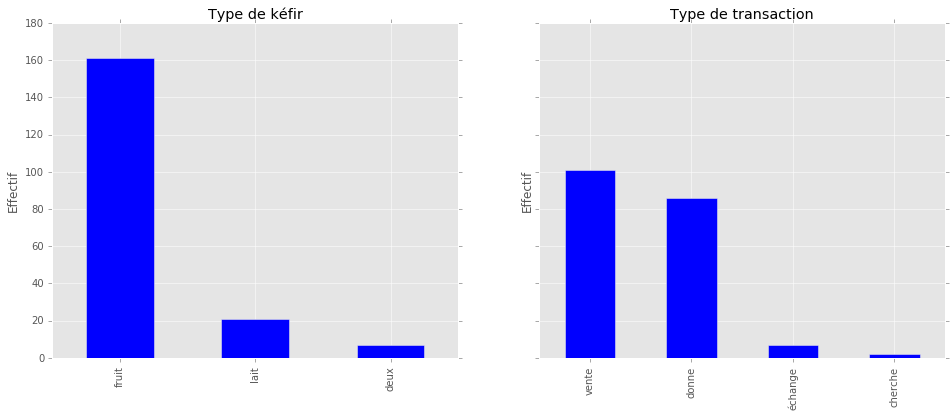

In [15]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

data["Type"].value_counts().plot(kind="bar",ax=ax[0])
ax[0].set_title("Type de kéfir")
ax[0].set_ylabel("Effectif")

data["transaction"].value_counts().plot(kind="bar",ax=ax[1])
ax[1].set_title("Type de transaction")
ax[1].set_ylabel("Effectif")

Tableau croisé des types de kéfir / transactions

In [175]:
pd.crosstab(data.type,data.transaction )

transaction,cherche,donne,vente,échange
type,,,,
deux,0,2,5,0
fruit,1,75,78,7
lait,1,5,15,0


Répartition des prix des annonces sur le kéfir

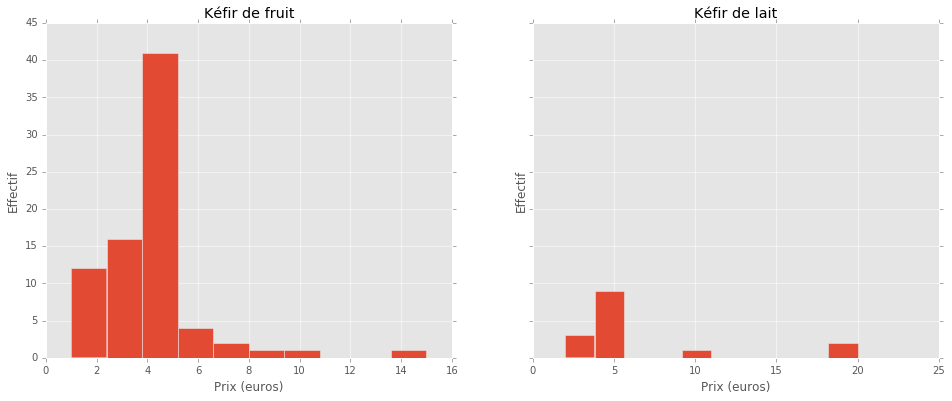

In [157]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6), sharey=True)
data[(data["prix"]!="NA") & (data["type"]=="fruit")]["prix"].hist(ax=ax[0])
ax[0].set_title("Kéfir de fruit")
ax[0].set_ylabel("Effectif")
ax[0].set_xlabel("Prix (euros)")
data[(data["prix"]!="NA") & (data["type"]=="lait")]["prix"].hist(ax=ax[1])
ax[1].set_title("Kéfir de lait")
ax[1].set_ylabel("Effectif")
ax[1].set_xlabel("Prix (euros)")

Prix au gramme du kéfir

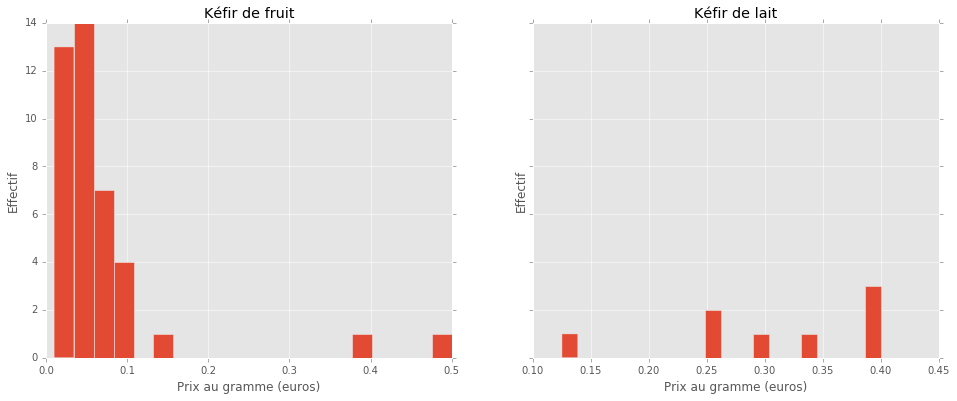

In [139]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6), sharey=True)
data[(data["poids_gramme"]!="NA") & (data["type"]=="fruit")]["poids_gramme"].hist(ax=ax[0],bins=20)
ax[0].set_title("Kéfir de fruit")
ax[0].set_ylabel("Effectif")
ax[0].set_xlabel("Prix au gramme (euros)")
data[(data["poids_gramme"]!="NA") & (data["type"]=="lait")]["poids_gramme"].hist(ax=ax[1],bins=20)
ax[1].set_title("Kéfir de lait")
ax[1].set_ylabel("Effectif")
ax[1].set_xlabel("Prix au gramme (euros)")

Présentation du kéfir comme un produit

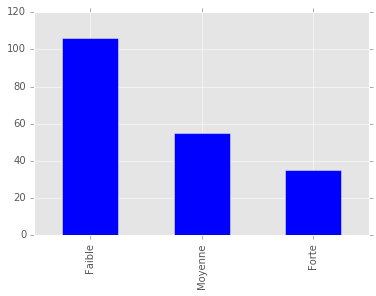

In [16]:
data["Produit"].value_counts().plot(kind="bar")

Mention explicite d'une recette

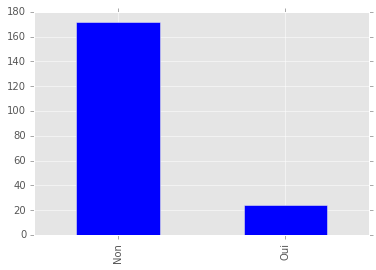

In [18]:
data["Recette"].value_counts().plot(kind="bar")

Mention des bienfaits

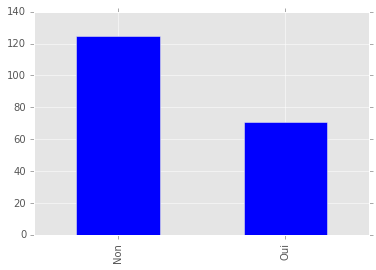

In [23]:
data["Bienfaits "].value_counts().plot(kind="bar")

Quelques croisements

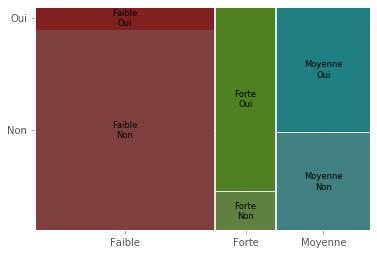

In [46]:
a = mosaic(pd.crosstab(data["Produit"],data["Bienfaits "]).stack())

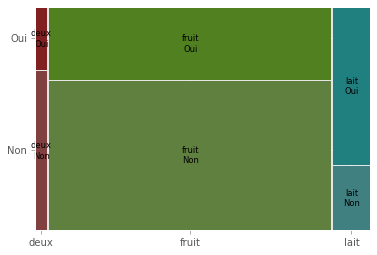

In [53]:
a = mosaic(pd.crosstab(data["Type"],data["Bienfaits "]).stack())

## Extraction à partir de craiglist

L'extraction est faite à partir d'un script tierce

In [55]:
data.columns

Index([             0,              1,              2,              3,
                    4,              5,         'Prix',        'Poids',
               'Type',   'Bienfaits ',      'Recette',      'Produit',
         'Importance',              7,  'transaction',   'poids_reco',
       'poids_gramme'],
      dtype='object')

In [81]:
data = pd.read_excel("craiglist-kefir-reco.xls")

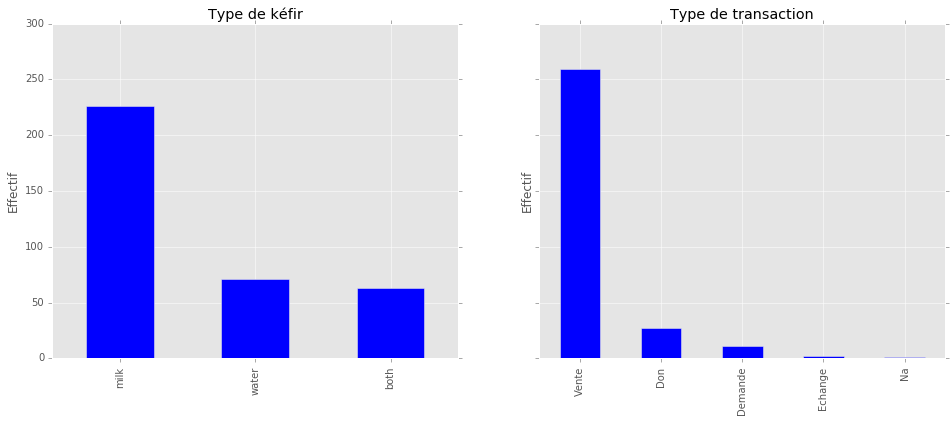

In [82]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

data["Type"].value_counts().plot(kind="bar",ax=ax[0])
ax[0].set_title("Type de kéfir")
ax[0].set_ylabel("Effectif")

data["transaction"].value_counts().plot(kind="bar",ax=ax[1])
ax[1].set_title("Type de transaction")
ax[1].set_ylabel("Effectif")

In [83]:
data

,0,1,2,3,4,5,6,7,8,Type,Bienfaits,Recette,Produit,transaction,Importance
0,5595617996,http://sarasota.craigslist.org/for/5595617996....,http://tampa.craigslist.org,//sarasota.craigslist.org/for/5595617996.html,Starbucks k-cups: Great Price,NaN,2016-05-20 13:02:00,The Village Cupboard currently has a ...,NaN,milk,Non,Non,Faible,Vente,NaN
1,5603264064,http://dallas.craigslist.org/dal/hab/560326406...,http://wichitafalls.craigslist.org,//dallas.craigslist.org/dal/hab/5603264064.html,milk and water kefir grains (2 tbsp),5,2016-06-02 20:43:00,I have milk and water kefir grains 2 ...,NaN,both,Non,Non,Faible,Vente,NaN
2,5647109651,http://corpuschristi.craigslist.org/hab/564710...,http://victoriatx.craigslist.org,//corpuschristi.craigslist.org/hab/5647109651....,Milk and Water Kefir,NaN,2016-06-21 17:39:00,I make my own homemade water and milk...,NaN,both,Oui,Non,Moyenne,Vente,x
3,5631569742,http://portland.craigslist.org/clk/hab/5631569...,http://yakima.craigslist.org,//portland.craigslist.org/clk/hab/5631569742.html,Organic Milk Kefir Grains,7,2016-06-18 16:17:00,"Milk kefir is a delicious, healthy pr...",NaN,both,Oui,Non,Moyenne,Vente,x
4,5553358924,http://vancouver.craigslist.ca/van/hab/5553358...,http://skagit.craigslist.org,http://vancouver.craigslist.ca/van/hab/5553358...,Organic Kefir Grains- Your Healthy Choice!,4,2016-05-18 20:51:00,The Kefir grains are a real miracle! ...,NaN,NaN,Oui,Non,Forte,Vente,x
5,5608259936,http://sheboygan.craigslist.org/zip/5608259936...,http://wausau.craigslist.org,//sheboygan.craigslist.org/zip/5608259936.html,Free milk kefir grains,NaN,2016-05-28 10:51:00,These are strong grains and they mult...,NaN,NaN,Non,Non,Faible,Don,NaN
6,5615535001,http://tulsa.craigslist.org/hab/5615535001.html,http://wichita.craigslist.org,//tulsa.craigslist.org/hab/5615535001.html,RAW MILK KEFIR GRAINS/BULGAROS,10,2016-06-20 06:12:00,Hello I am selling Fresh RAW Milk Kef...,NaN,milk,Non,Non,Forte,Vente,NaN
7,5541809356,http://nwga.craigslist.org/hab/5541809356.html,http://nwga.craigslist.org,/hab/5541809356.html,Kefir Grains-Live-Milk - 1/4 Cup = 4 Tablespoo...,30,2016-05-16 11:33:00,Live Milk Kefir Grains ( NOT Powder...,NaN,milk,Oui,Oui,Forte,Vente,x
8,5637683137,http://worcester.craigslist.org/grd/5637683137...,http://worcester.craigslist.org,/grd/5637683137.html,KEFIR GRAINS CULTURED PROBIOTIC YOGURT MILK DR...,12,2016-06-22 10:03:00,You are Buying 3 healthy tbsp (tables...,NaN,milk,Oui,Non,Moyenne,Vente,x
9,5633645594,http://toronto.craigslist.ca/mss/hab/563364559...,http://buffalo.craigslist.org,http://toronto.craigslist.ca/mss/hab/563364559...,MILK KEFIR GRAINS FOR SALE,10,2016-06-13 13:58:00,I have fresh milk kefir grains. Make...,NaN,milk,Oui,Non,Moyenne,NaN,x


In [94]:
def fun(row):
    if row["transaction"]=="Vente":
        try:
            return int(row[5])
        except:
            return "NA"
    else:
        return "NA"
data["prix"] = data.apply(fun,axis=1)
data.Bienfaits = data.Bienfaits.apply(lambda x: x.strip())
data.Produit = data.Produit.apply(lambda x: x.strip())

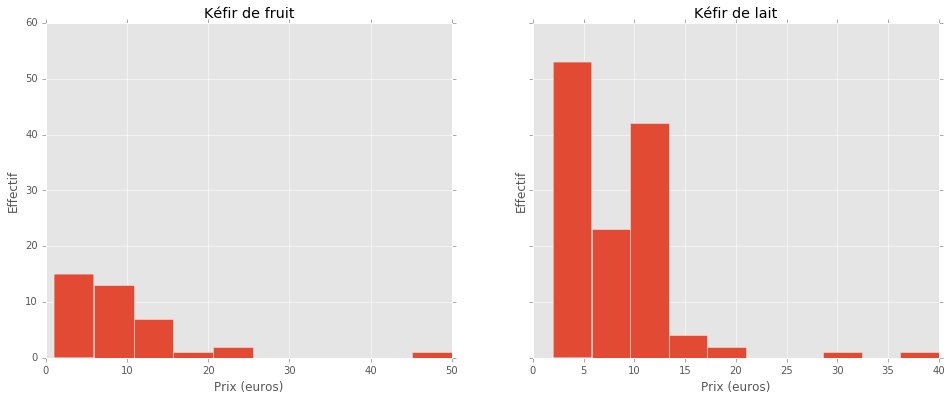

In [85]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6), sharey=True)
data[(data["prix"]!="NA") & (data["Type"]=="water")]["prix"].hist(ax=ax[0])
ax[0].set_title("Kéfir de fruit")
ax[0].set_ylabel("Effectif")
ax[0].set_xlabel("Prix (euros)")
data[(data["prix"]!="NA") & (data["Type"]=="milk")]["prix"].hist(ax=ax[1])
ax[1].set_title("Kéfir de lait")
ax[1].set_ylabel("Effectif")
ax[1].set_xlabel("Prix (euros)")

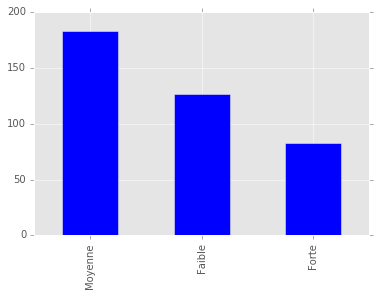

In [95]:
data["Produit"].value_counts().plot(kind="bar")

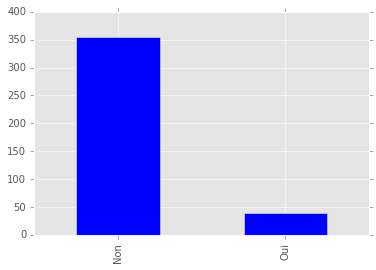

In [87]:
data["Recette"].value_counts().plot(kind="bar")

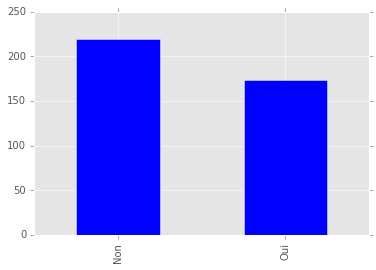

In [91]:
data["Bienfaits"].value_counts().plot(kind="bar")

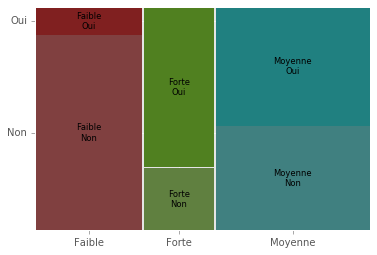

In [96]:
a = mosaic(pd.crosstab(data["Produit"],data["Bienfaits"]).stack())